# Superhero movies analysis
## Midterm: MongoDB Notebooks

### Evelyn Lee
### May 20 ,2022
### This notebook will explore the superhero movie datasets from IMDb and create charts to explore fun facts about the movies. With large datasets provided, I thought it would be interesting to analyze the movies data to answer the question: What cause superhero movies to be successful? (make more money, higher ratings)

Read MongoDB connection string from a credentials file

In [1]:
import json

# read mongo DB connection string from json file
with open('credentials.json') as f:
    data=json.load(f)
    mongo_conn_str = data['mongodb']

reads data from MongoDB into memory

In [2]:
import pymongo

# connect to the movie database and verify it's working
client = pymongo.MongoClient(mongo_conn_str)
db = client.movies
serverStatusResult=db.command('serverStatus')
print(serverStatusResult)

{'host': 'cluster0-shard-00-02.ihwih.mongodb.net:27017', 'version': '5.0.8', 'process': 'mongod', 'pid': 109132, 'uptime': 483280.0, 'uptimeMillis': 483279628, 'uptimeEstimate': 483279, 'localTime': datetime.datetime(2022, 5, 22, 7, 33, 45, 311000), 'asserts': {'regular': 0, 'warning': 0, 'msg': 0, 'user': 0, 'rollovers': 0}, 'connections': {'current': 6, 'available': 494, 'totalCreated': 227}, 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0}, 'network': {'bytesIn': 8694010, 'bytesOut': 146575392, 'numRequests': 9241}, 'opcounters': {'insert': 23, 'query': 95, 'update': 0, 'delete': 0, 'getmore': 29, 'command': 9087, 'deprecated': {'query': 0, 'getmore': 0}}, 'opcountersRepl': {'insert': 0, 'query': 0, 'update': 0, 'delete': 0, 'getmore': 0, 'command': 0, 'deprecated': {'query': 0, 'getmore': 0}}, 'repl': {'topologyVersion': {'processId': ObjectId('628287892bdf0069896337ff'), 'counter': 6}, 'hosts': ['cluster0-shard-00-00.ihwih.mongodb.net:27017', 'cluster0-shard-00-

## Execute query on the movie data and print the results in DataFrame.

In [3]:
import pandas as pd

cursor_imdb = db['imdb'].find() 

# expand the cursor and add to the DataFrame
imdb = pd.DataFrame(list(cursor_imdb))
imdb = imdb.drop('_id', 1)
imdb.index += 1

In [4]:
imdb.head()


,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,...,Producer5,Company1,Company2,Company3,Director2,Company4,Company5,Director3,Director4,Director5
1,6320628,Spider-Man: Far from Home,129.0,7.7,200908.0,PG-13,2019,6,26,160.0,...,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN,NaN,NaN,NaN,NaN
2,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,356.0,...,Jon Favreau,Marvel Studios,NaN,NaN,Joe Russo,NaN,NaN,NaN,NaN,NaN
3,6565702,Dark Phoenix,113.0,5.8,96585.0,PG-13,2019,6,5,200.0,...,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,NaN,Kinberg Genre,Marvel Entertainment,NaN,NaN,NaN
4,468569,The Dark Knight,152.0,9.0,2105721.0,TV-14::(LV),2008,7,14,185.0,...,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,NaN,DC Comics,NaN,NaN,NaN,NaN
5,1477834,Aquaman,143.0,7.0,300580.0,PG-13,2018,11,26,160.0,...,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,NaN,Rodeo FX,The Safran Company,NaN,NaN,NaN


In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 1 to 484
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              484 non-null    object 
 1   Title           484 non-null    object 
 2   Runtime         448 non-null    float64
 3   Rating          459 non-null    float64
 4   Votes           459 non-null    float64
 5   MPAARating      317 non-null    object 
 6   ReleaseYear     484 non-null    int64  
 7   ReleaseMonth    484 non-null    int64  
 8   ReleaseDay      484 non-null    int64  
 9   Budget          284 non-null    float64
 10  OpeningWeekend  167 non-null    float64
 11  GrossSales      150 non-null    float64
 12  Genres          484 non-null    object 
 13  Cast1           484 non-null    object 
 14  Cast2           484 non-null    object 
 15  Cast3           476 non-null    object 
 16  Cast4           472 non-null    object 
 17  Cast5           467 non-null    obj

In [6]:
imdb.isna().sum()

ID                  0
Title               0
Runtime            36
Rating             25
Votes              25
MPAARating        167
ReleaseYear         0
ReleaseMonth        0
ReleaseDay          0
Budget            200
OpeningWeekend    317
GrossSales        334
Genres              0
Cast1               0
Cast2               0
Cast3               8
Cast4              12
Cast5              17
Cast6              21
Cast7              26
Cast8              28
Cast9              31
Cast10             34
Director1           0
Producer1           0
Producer2          51
Producer3         115
Producer4         158
Producer5         203
Company1            0
Company2          169
Company3          255
Director2         424
Company4          329
Company5          366
Director3         476
Director4         480
Director5         480
dtype: int64

In [7]:
imdb.describe()

,Runtime,Rating,Votes,ReleaseYear,ReleaseMonth,ReleaseDay,Budget,OpeningWeekend,GrossSales
count,448.000000,459.000000,4.590000e+02,484.000000,484.000000,484.000000,284.000000,167.000000,150.000000
mean,102.053571,5.925926,1.104748e+05,2005.214876,6.626033,15.828512,99.746479,64.946108,279.766667
std,25.958007,1.476631,2.292722e+05,10.896051,3.345932,8.853859,136.088567,101.303746,260.199882
min,30.000000,1.100000,5.000000e+00,1978.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,87.000000,5.000000,1.220000e+02,1997.000000,4.000000,8.000000,15.000000,11.000000,65.000000
50%,98.000000,6.200000,3.398000e+03,2008.000000,7.000000,16.000000,51.000000,35.000000,188.000000
75%,114.250000,7.000000,9.330200e+04,2014.000000,10.000000,24.000000,142.250000,73.500000,423.750000
max,275.000000,9.000000,2.105721e+06,2019.000000,12.000000,31.000000,990.000000,870.000000,890.000000


In [8]:
# import matplotlib to create charts
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# using seaborn
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})

# How many movies were released each year?

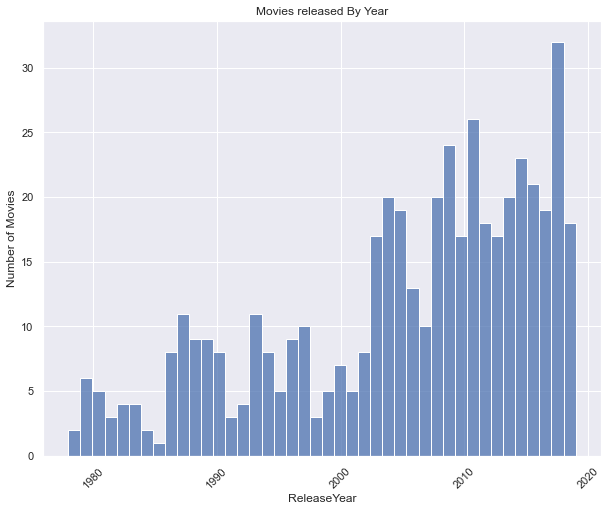

In [9]:
plt.title('Movies released By Year')
sns.histplot(data=imdb, x='ReleaseYear', bins=42)
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

More movies were released recent years.

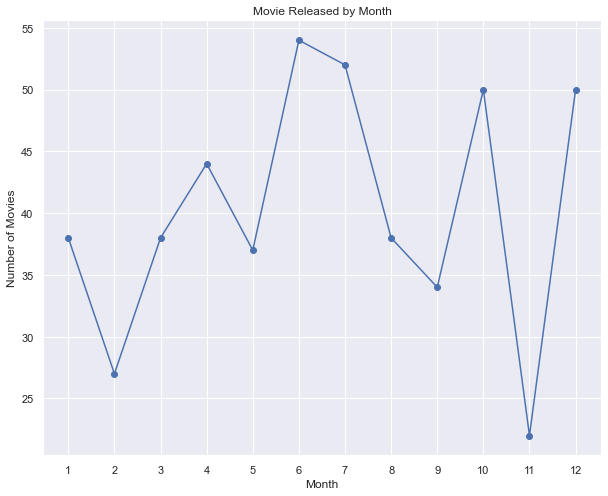

In [37]:
# Find average scores grouped by months
movies = imdb.groupby(imdb['ReleaseMonth']).agg({'Title':'count'})
plt.title('Movie Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

# Prevent years convert to decimals
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xticks(range(0,13))
plt.plot(movies, '-o')
plt.show()

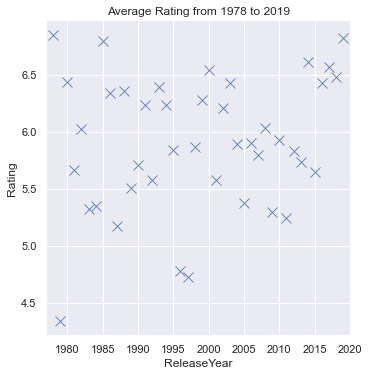

In [10]:
# rating average for each year
avg_rating = imdb.groupby('ReleaseYear').agg({'Rating':'mean'})
g = sns.relplot(x=avg_rating.index, y='Rating', data=avg_rating, marker="x", s=100)
plt.title('Average Rating from 1978 to 2019')
g.set(xlim=(1977, 2020))
plt.show()

# What is the best month to release movie to be successful?

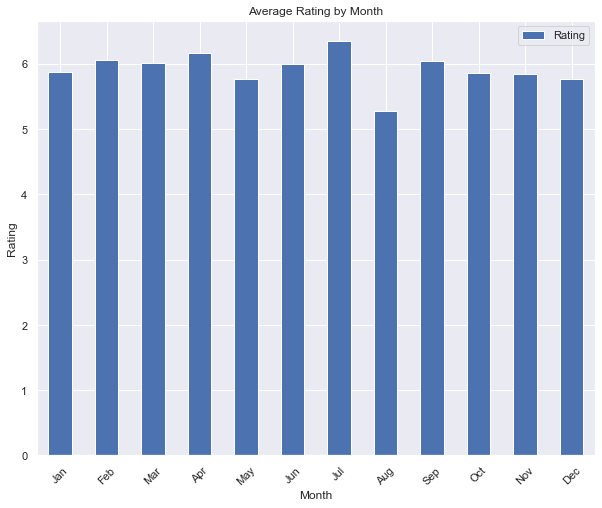

In [22]:
# The plot shows average movie rating by month
ratings = imdb.groupby('ReleaseMonth').agg({'Rating':'mean'})

r = ratings.plot(kind='bar')
r.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
r.set_xlabel('Month')
r.set_ylabel('Rating')

plt.title('Average Rating by Month')
plt.show()



Based on Audience ratings, the highest rating movies were released in July.

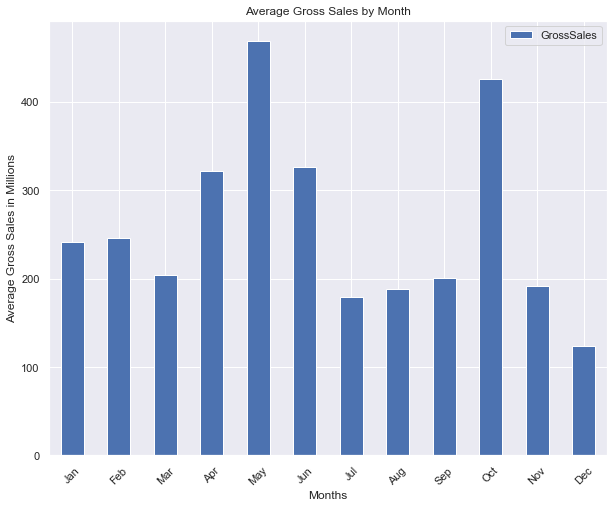

In [14]:
gross = imdb.groupby(imdb['ReleaseMonth']).agg({'GrossSales':'mean'})
g = gross.plot(kind='bar')
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
g.set_xlabel('Months')
g.set_ylabel('Average Gross Sales in Millions')
plt.title('Average Gross Sales by Month')
plt.show()

The highest average gross sales for movies is in May, then October.

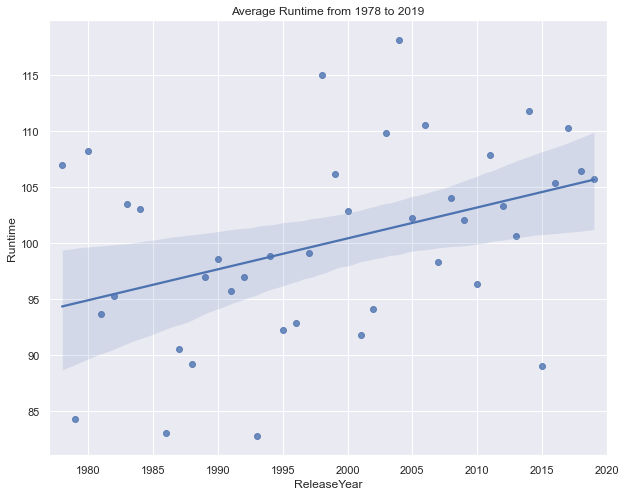

In [ ]:
# Runtime average for each year
avg_runtime = imdb.groupby('ReleaseYear').agg({'Runtime':'mean'})
g = sns.regplot(x=avg_runtime.index, y='Runtime', data=avg_runtime)
plt.title('Average Runtime from 1978 to 2019')
g.set(xlim=(1977, 2020))
plt.show()


# How movie length affect audience ratings?

<AxesSubplot:xlabel='Rating', ylabel='Runtime'>

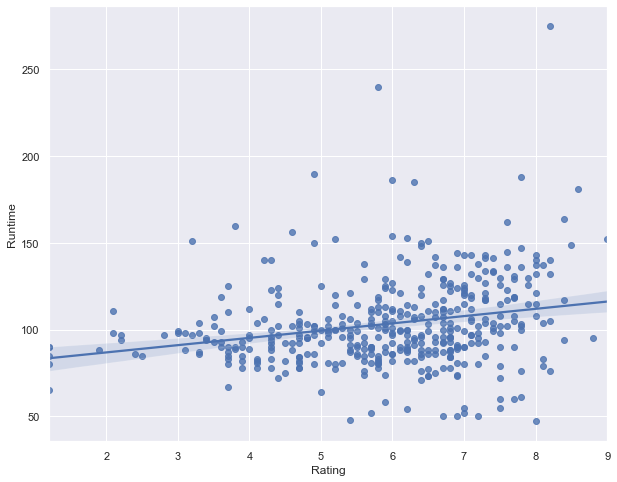

In [ ]:
sns.regplot(x='Rating', y='Runtime', data=imdb)

In [15]:
# top 30 movies vs lowest 30 movies runtime
# find top 30 rated movies runtime average
top_30 = imdb[['Rating','Runtime']].groupby('Rating').mean().sort_values('Rating', ascending=False).head(30)

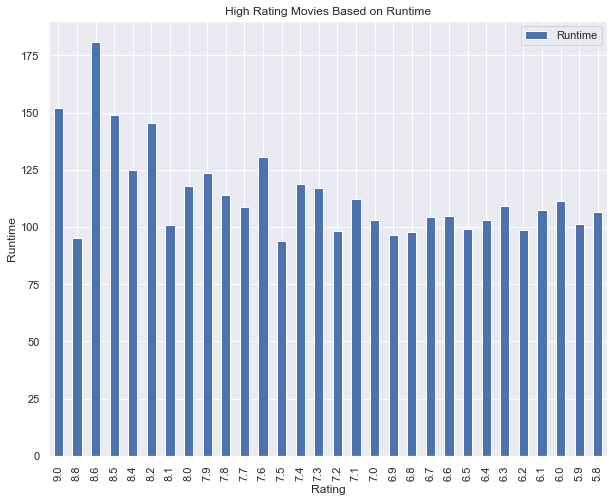

Runtime    114.2578
dtype: float64


In [ ]:
top_30.plot(kind='bar')
plt.title('High Rating Movies Based on Runtime')
plt.ylabel('Runtime')
plt.show()
print(top_30.mean())

In [ ]:
# find bottom 30 rated movies runtime average
bottom_30 = imdb[['Rating','Runtime']].groupby('Rating').mean().sort_values('Rating', ascending=True).head(30)

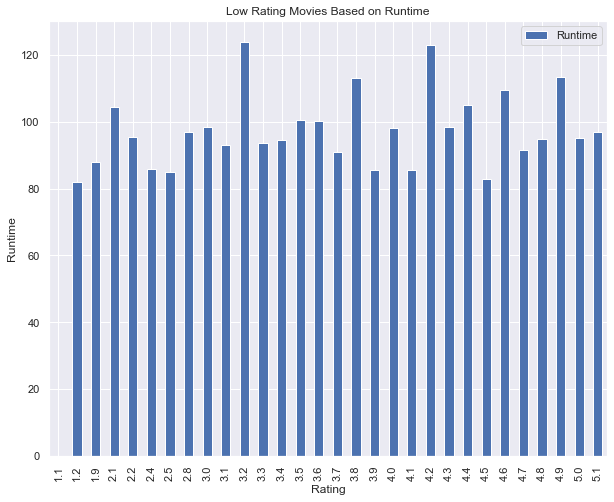

Runtime    97.48466
dtype: float64


In [ ]:
bottom_30.plot(kind='bar')
plt.title('Low Rating Movies Based on Runtime')
plt.ylabel('Runtime')
plt.show()
print(bottom_30.mean())

Based on the graphs, the most top rated movies runtime is about 114.26 minutes, and the least rated movies runtime is about 97.48 minutes. Longer movies have higher ratings.

<AxesSubplot:xlabel='Rating', ylabel='GrossSales'>

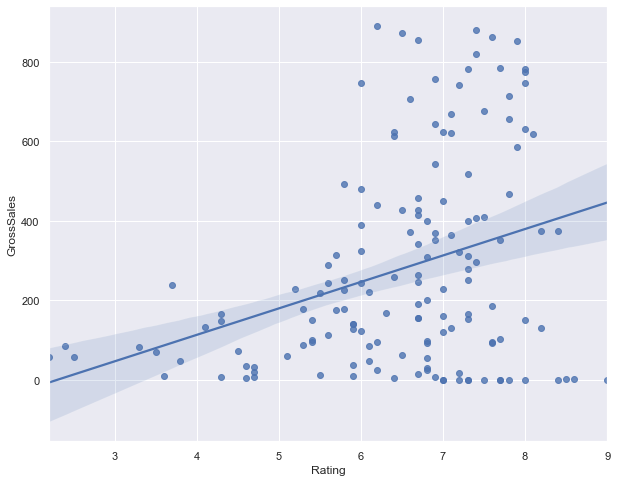

In [ ]:
# ratings vs gross sales
sns.regplot(x='Rating', y='GrossSales', data=imdb)

Higher rating movies made higher gross sales.

<AxesSubplot:xlabel='Rating', ylabel='Budget'>

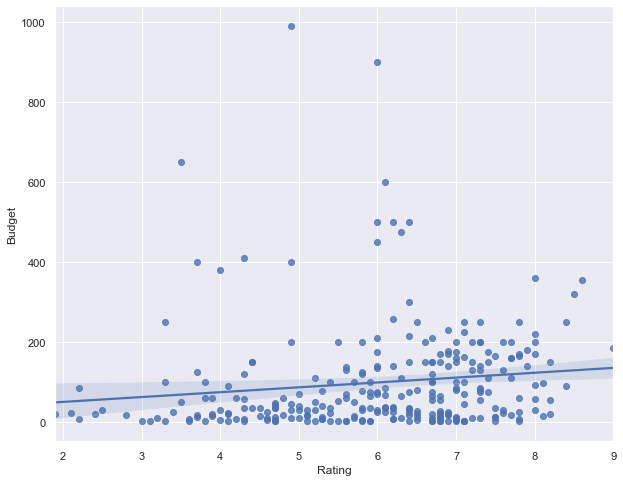

In [ ]:
# rating vs budget
sns.regplot(x='Rating', y='Budget', data=imdb)

No much impact for movie budget on rating.

<AxesSubplot:xlabel='Rating', ylabel='Votes'>

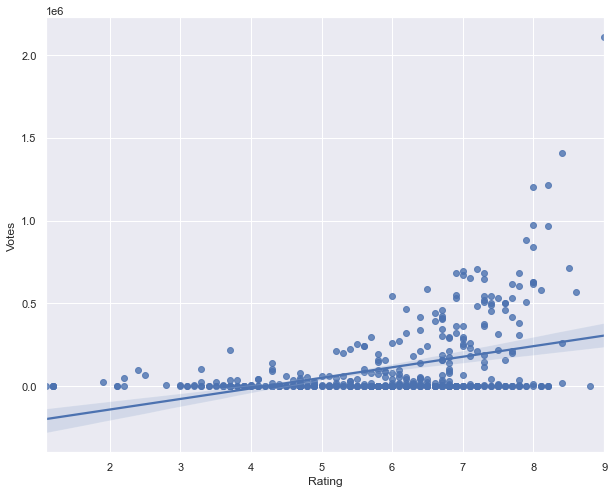

In [ ]:
# Rating vs vote
sns.regplot(x='Rating', y='Votes', data=imdb)

# Do movies with longer runtime make higher gross sales?

<AxesSubplot:xlabel='Runtime', ylabel='GrossSales'>

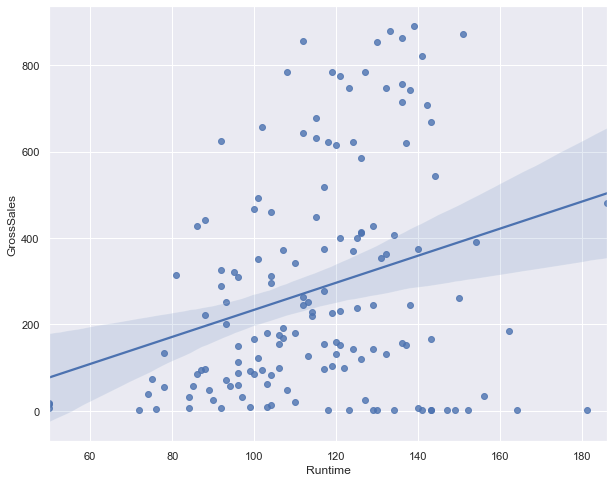

In [24]:
# runtime vs gross sales
sns.regplot(x='Runtime', y='GrossSales', data=imdb)

# Conclusions
### For a movie to be successful, the movies make more profit if released in May and October and the movies released in July have higher ratings. More movies were released recent years and in June and July, I think it is becuase of summer break. From the analysis, gross sales is directly connected to the budget. Higher budgets movies have higher revenue. Movie runtime also increase year by year. Most of the movies have runtime between 80 to 140 minutes. There is slightly positive relationship between movie runtime and gross sales. Longer movies have higher ratings. Higher rating movies made higher gross sales. Some limitations for the analysis is that there are a lot of missing data. If more data are collected, the more accurate the analysis will be. Some further studies would be to clean and analyze Genre data to find what the audience like to watch.

# Extras

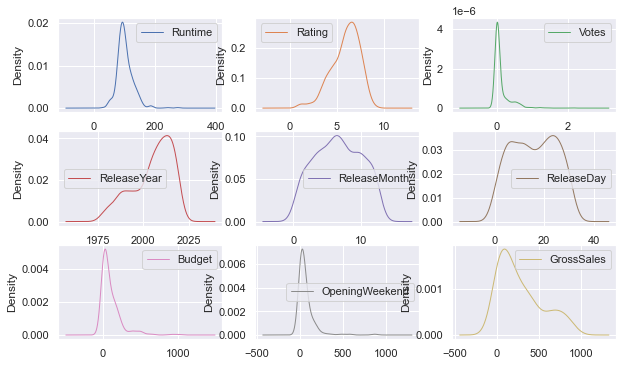

In [ ]:
imdb.plot(linewidth=1, kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

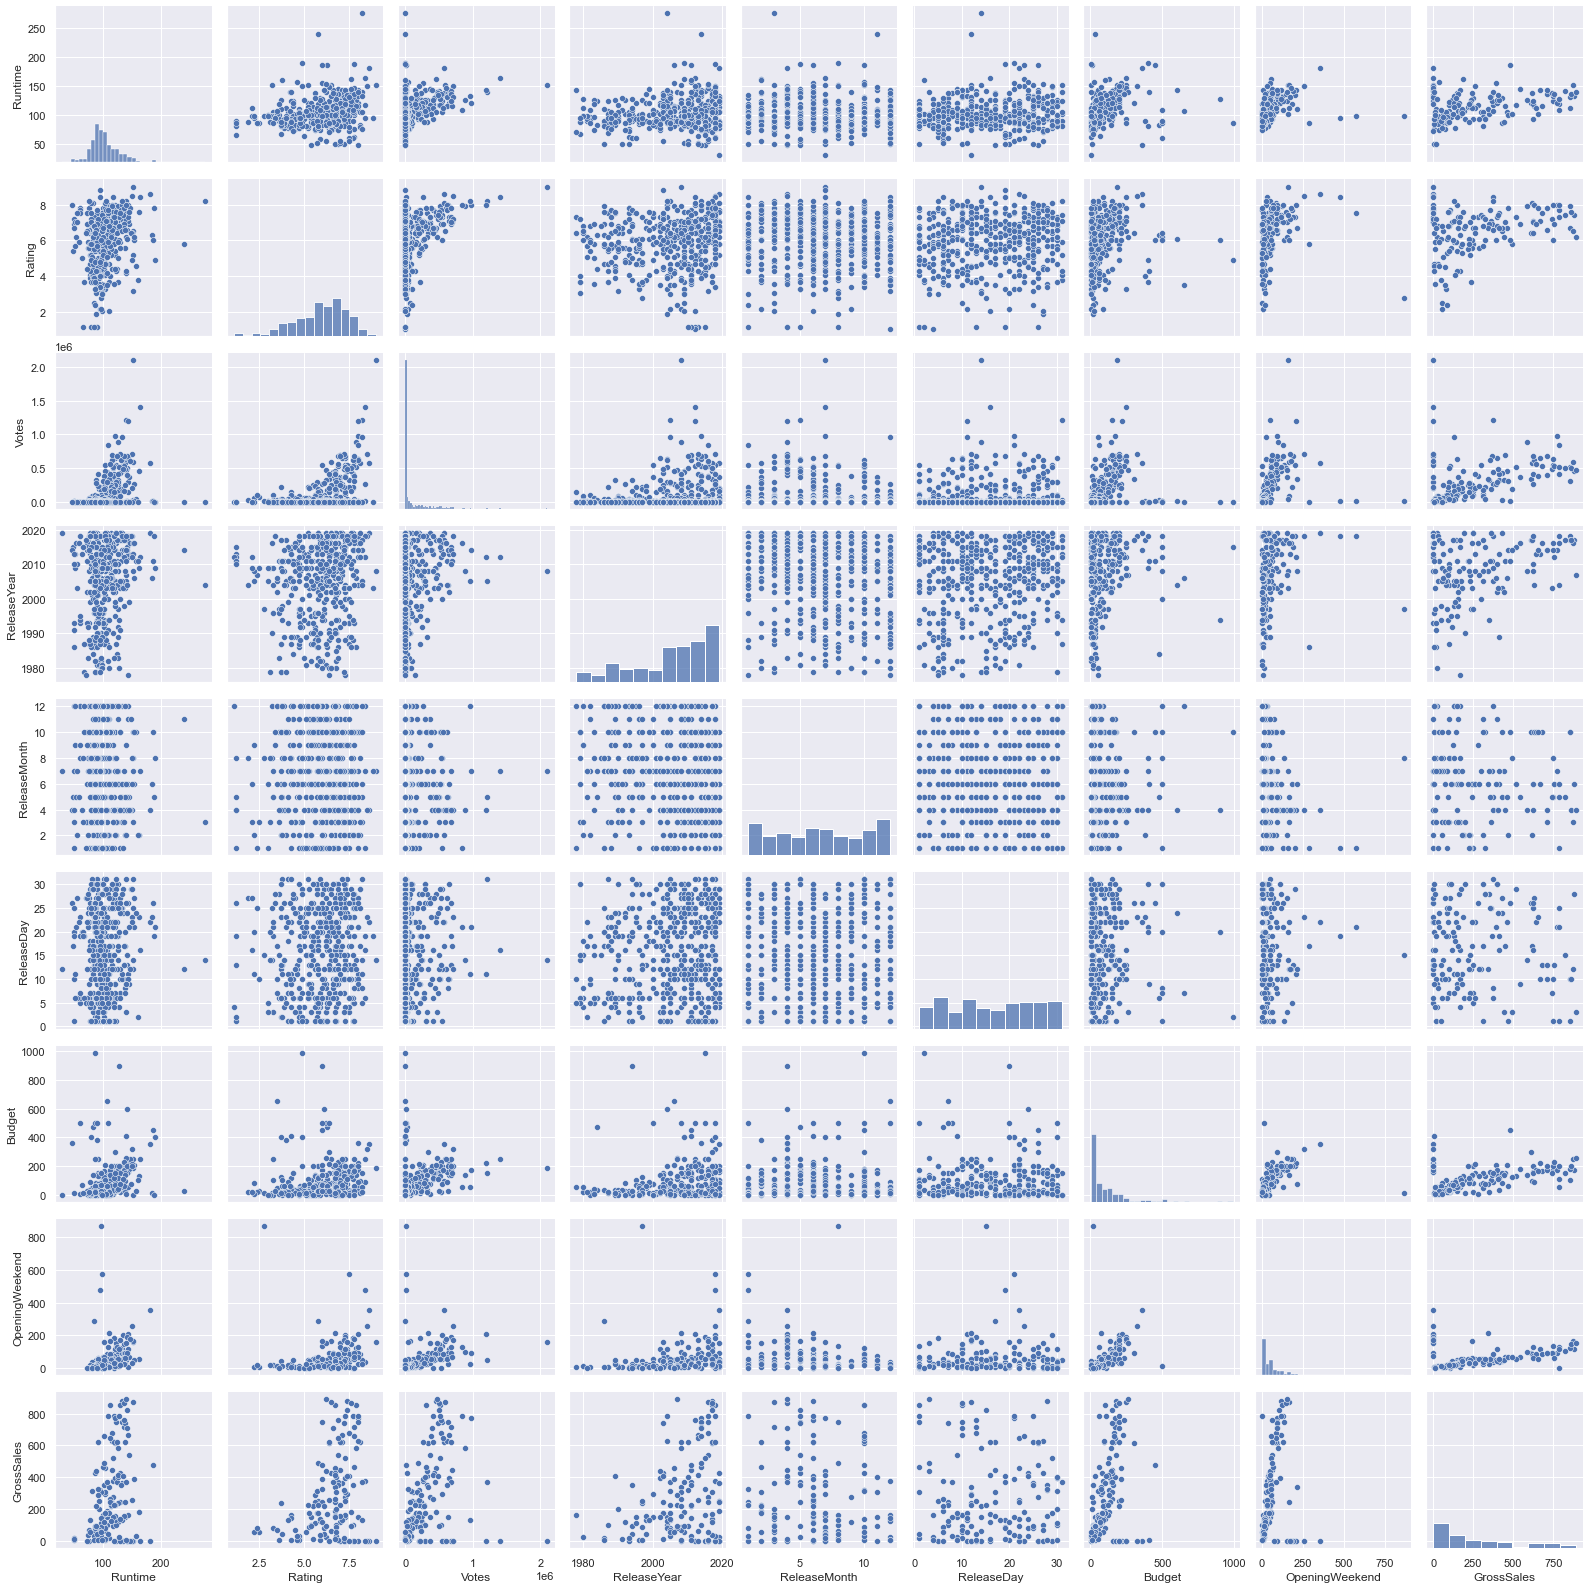

In [ ]:
sns.pairplot(imdb)